In [1]:
import sympy as sp

sp.init_printing()

In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

import warnings
warnings.filterwarnings("ignore")

### Intro

In [3]:
2+2

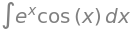

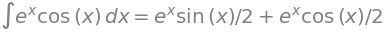

In [4]:
x = sp.symbols('x')
a = sp.Integral(sp.cos(x)*sp.exp(x), x)

x
a
a.doit()
sp.Eq(a, a.doit())

In [5]:
sp.integrate(sp.cos(x)*sp.exp(x), x)

In [6]:
sp.integrate(sp.cos(x)*sp.exp(x), (x, 0, sp.pi))

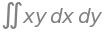

In [7]:
sp.Integral(sp.Integral(sp.abc.x * sp.abc.y, sp.abc.x), sp.abc.y)

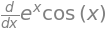

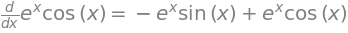

In [8]:
dydx = sp.Derivative(sp.cos(x)*sp.exp(x), x)
dydx
sp.Eq(dydx, dydx.doit())

In [9]:
1 / sp.sqrt(2)
sp.sqrt(8)

In [10]:
x, y = sp.symbols('x y')
expr = x + 2*y
expr
expr - x
expr + 1
x * expr
sp.factor(x * expr)
sp.expand(x * expr)

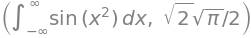

In [11]:
# infinity: sp.S.Infinity or sp.oo
y = sp.Integral(sp.sin(x**2), (x, -sp.oo, sp.oo))
ans = y.doit()
y, ans
# for some reason sp.Eq(y, ans) freezes

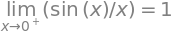

In [12]:
lim = sp.Limit(sp.sin(x)/x, x, 0)
sp.Eq(lim, lim.doit())
sp.limit(sp.sin(x)/x, x, 0)

In [13]:
sp.Eq(x**2 - 2, 0)
sp.solve(x**2 - 2, x)

In [14]:
root = sp.solve(x**2 - 2, x)[1]
root

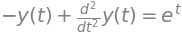

In [15]:
y = sp.Function('y')
t = sp.abc.t
diff_eq = sp.Eq(y(t).diff(t, t) - y(t), sp.exp(t))
diff_eq
sp.dsolve(diff_eq, y(t))

In [16]:
A = sp.Matrix([[1, 2], [2, 2]])
A
A.eigenvals()
A.eigenvects()

⎡1  2⎤
⎢    ⎥
⎣2  2⎦

⎡⎛            ⎡⎡  √17   1⎤⎤⎞  ⎛            ⎡⎡  1   √17⎤⎤⎞⎤
⎢⎜3   √17     ⎢⎢- ─── - ─⎥⎥⎟  ⎜3   √17     ⎢⎢- ─ + ───⎥⎥⎟⎥
⎢⎜─ - ───, 1, ⎢⎢   4    4⎥⎥⎟, ⎜─ + ───, 1, ⎢⎢  4    4 ⎥⎥⎟⎥
⎢⎜2    2      ⎢⎢         ⎥⎥⎟  ⎜2    2      ⎢⎢         ⎥⎥⎟⎥
⎣⎝            ⎣⎣    1    ⎦⎦⎠  ⎝            ⎣⎣    1    ⎦⎦⎠⎦

In [17]:
A.eigenvects()[0][-1]

⎡⎡  √17   1⎤⎤
⎢⎢- ─── - ─⎥⎥
⎢⎢   4    4⎥⎥
⎢⎢         ⎥⎥
⎣⎣    1    ⎦⎦

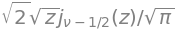

In [18]:
# bessel function
sp.besselj(sp.abc.nu, sp.abc.z)
# rewrite bessel function as spherical bessel function
sp.besselj(sp.abc.nu, sp.abc.z).rewrite(sp.jn)

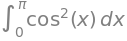

\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx


In [19]:
expr = sp.Integral(sp.cos(x)**2, (x, 0, sp.pi))
expr
print(sp.latex(expr))

renders as: $\int\limits_{0}^{\pi} \cos^{2}{\left(x \right)}\, dx$

In [20]:
x, y = sp.abc.x, sp.abc.y
expr = x * y
expr
# substitute x = 2, y = 2 into expr
expr.subs([(x, 2), (y, 2)])

### Gotchas: python conventions, equality, rationals, types

In [21]:
# to see if a = b mathematically, instead check if a - b = 0

a = (x + 1)**2
b = x**2 + 2*x + 1
sp.simplify(a - b)

c = x**2 - 2*x + 1
sp.simplify(a - c)

In [22]:
# another way to check if a = b mathematically
a = sp.cos(x)**2 - sp.sin(x)**2
b = sp.cos(2*x)
a.equals(b)

True

In [23]:
# numbers don't get type casted as symbols unless you force them to or broadcast
type(sp.Integer(1) + 1)
type(1 + 1)

sympy.core.numbers.Integer

int

In [24]:
one_third = sp.Integer(1) / sp.Integer(3)
one_third
type(one_third)
sp.Rational(1, 3)
1 / 3

sympy.core.numbers.Rational

In [25]:
x + 1/2
x + sp.Rational(1, 2)

### Basics: sub, eval, evalf, sympify, lamdify

In [26]:
expr = sp.cos(x) + 1
expr.subs(x, y)
expr.subs(x, 0)

In [27]:
expr = x**y
expr
expr = expr.subs(y, x**y)
expr
expr = expr.subs(y, x**x)
expr

In [28]:
expr = sp.sin(2*x) + sp.cos(2*x)
expr
sp.expand_trig(expr)
expr.subs(sp.sin(2*x), 2*sp.sin(x)*sp.cos(x))

In [29]:
x, y, z = sp.symbols('x y z')
expr = x**3 + 4*x*y - z
expr
expr.subs([(x, 2), (y, 4), (z, 0)])

In [30]:
# replace all even powers of x with y
expr = x**4 - 4*x**3 + 4*x**2 - 2*x + 3
expr
replacements = [(x**i, y**i) for i in range(5) if i % 2 == 0]
expr.subs(replacements)

In [31]:
# can directly parse simple strings to sympy using sympify
sp.sympify("x**2 + 3*x - 1/2")
sp.sympify("y(x) - x**2")
sp.sympify("-hbar**2 / (2*m)")

In [32]:
# eval expression as sympy float using evalf or python float using float
sp.pi.evalf(10)
sp.sqrt(2).evalf(5)
type(sp.sqrt(2).evalf(5))
float(sp.sqrt(2).evalf(5))
type(float(sp.sqrt(2)))

sympy.core.numbers.Float

float

In [33]:
expr = sp.cos(2*x)
expr.subs(x, 2.4).evalf()
expr.evalf(subs={x: 2.4})  # more numerically stable than expr.subs(x, 2.4).evalf()

one = sp.cos(1)**2 + sp.sin(1)**2
(one - 1).evalf()
(one - 1).evalf(chop=True)  # remove trailing digits from result

In [34]:
# more efficient to eval expression at many points using numpy via lambdify
# can also use scipy and math libraries

import numpy as np
a = np.arange(10)
expr = sp.sin(x)
f = sp.lambdify(x, expr, "numpy")
a
expr
f(a)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

array([ 0.        ,  0.84147098,  0.90929743,  0.14112001, -0.7568025 ,
       -0.95892427, -0.2794155 ,  0.6569866 ,  0.98935825,  0.41211849])

### Printing

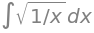

In [35]:
expr = sp.Integral(sp.sqrt(1/x), x)
expr

In [36]:
# print raw latex string
print(sp.latex(expr))

\int \sqrt{\frac{1}{x}}\, dx


In [37]:
# raw string
str(expr)

'Integral(sqrt(1/x), x)'

In [38]:
# print exact functional form
sp.srepr(expr)

"Integral(Pow(Pow(Symbol('x'), Integer(-1)), Rational(1, 2)), Tuple(Symbol('x')))"

In [39]:
# pretty printing with ascii, unicode
sp.pprint(expr, use_unicode=False)
print()
sp.pprint(expr, use_unicode=True)

  /          
 |           
 |     ___   
 |    / 1    
 |   /  -  dx
 | \/   x    
 |           
/            

⌠           
⎮     ___   
⎮    ╱ 1    
⎮   ╱  ─  dx
⎮ ╲╱   x    
⌡           


### Simplification: simplify, factor, expand, trig, special functions

In [40]:
x, y, z = sp.symbols('x y z')

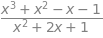

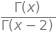

In [41]:
expr = sp.sin(x)**2 + sp.cos(x)**2
expr
sp.simplify(expr)

expr = (x**3 + x**2 - x - 1)/(x**2 + 2*x + 1)
expr
sp.simplify(expr)

expr = sp.gamma(x)/sp.gamma(x - 2)
expr
sp.simplify(expr)

In [42]:
expr = x**2 + 2*x + 1
expr
sp.simplify(expr)
sp.factor(expr)
sp.expand(expr)

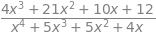

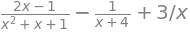

In [43]:
# for partial fraction decomp use apart
expr = (4*x**3 + 21*x**2 + 10*x + 12) / (x**4 + 5*x**3 + 5*x**2 + 4*x)
expr
sp.apart(expr)

In [44]:
# trig stuff
sp.cos(sp.acos(x))

expr = sp.sin(x)*sp.tan(x) / sp.sec(x)
expr, sp.trigsimp(expr)

expr = sp.sin(x + y)
expr, sp.expand_trig(expr)

In [45]:
# exp and log stuff
x, y = sp.symbols('x y', positive=True)
n = sp.symbols('n', real=True)

expr = sp.log(x + y)
expr
sp.exp(expr)

expr = sp.log(x*y)
expr
sp.expand(expr)
sp.expand_log(expr)

sp.logcombine(n*sp.log(x) + sp.log(y))

In [46]:
# special functions
x, y, z, n, k = sp.symbols('x y z n k')

sp.factorial(n)
sp.binomial(n, k)
sp.gamma(z)
sp.hyper([1, 2], [3], z)

 ┌─  ⎛1, 2 │  ⎞
 ├─  ⎜     │ z⎟
2╵ 1 ⎝ 3   │  ⎠

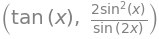

In [47]:
# manipulating special functions

sp.tan(x), sp.tan(x).rewrite(sp.sin)
sp.factorial(x), sp.factorial(x).rewrite(sp.gamma)
sp.gamma(x + 3), sp.expand(sp.gamma(x + 3)), sp.expand_func(sp.gamma(x + 3))

expr = sp.binomial(n+1, k+1) / sp.binomial(n, k)
expr, sp.simplify(expr), sp.combsimp(expr)

expr = sp.gamma(x)*sp.gamma(1 - x)
expr, sp.simplify(expr), sp.gammasimp(expr)

### Calculus: derivatives, integrals, limits, series, finite differences

In [48]:
x, y, z = sp.symbols('x y z')

In [49]:
sp.diff(sp.cos(x), x)
sp.diff(sp.exp(x**2), x)

sp.diff(x**4, x, x, x)
sp.diff(x**4, x, 3) # 3rd derivative

expr = x**5
expr, expr.diff(x)

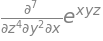

In [50]:
expr = sp.exp(x*y*z)
expr
sp.Derivative(expr, x, y, y, z, z, z, z)
sp.diff(expr, x, y, y, z, z, z, z)
sp.diff(expr, x, y, 2, z, 4)
sp.diff(expr, x, y, y, z, 4)

In [51]:
expr = sp.exp(x*y*z)
sp.Derivative(expr, x), sp.Derivative(expr, x).doit()

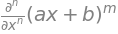

In [52]:
# derivative of arbitrary order n
m, n, a, b = sp.symbols('m n a b')
expr = (a*x + b)**m
expr.diff((x, n))
expr.subs(m, 2).diff((x, n)).subs(n, 1)

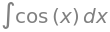

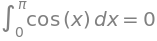

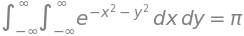

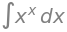

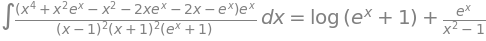

              ⎧ Γ(y + 1)    for re(y) > -1
∞             ⎪                           
⌠             ⎪∞                          
⎮  y  -x      ⎪⌠                          
⎮ x ⋅ℯ   dx = ⎨⎮  y  -x                   
⌡             ⎪⎮ x ⋅ℯ   dx    otherwise   
0             ⎪⌡                          
              ⎪0                          
              ⎩                           

In [53]:
# integrals
expr = sp.cos(x)
sp.Integral(expr, x)
sp.Integral(expr, x).doit()
sp.integrate(expr, x)

integral = sp.Integral(expr, (x, 0, sp.pi))
sp.Eq(integral, integral.doit())

integral = sp.Integral(sp.exp(-x**2 - y**2), (x, -sp.oo, sp.oo), (y, -sp.oo, sp.oo))
sp.Eq(integral, integral.doit())

sp.integrate(x**x, x) # no analytic form

integral = sp.Integral((x**4 + x**2*sp.exp(x) - x**2 - 2*x*sp.exp(x) - 2*x - 
                        sp.exp(x))*sp.exp(x)/((x - 1)**2*(x + 1)**2*(sp.exp(x) + 1)), x)
sp.Eq(integral, integral.doit())

integral = sp.Integral(x**y*sp.exp(-x), (x, 0, sp.oo))
sp.Eq(integral, integral.doit())

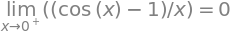

In [54]:
# limits

expr = sp.Limit((sp.cos(x) - 1)/x, x, 0)
sp.Eq(expr, expr.doit())
sp.limit((sp.cos(x) - 1)/x, x, 0)

sp.limit(1/x, x, 0, '-')
sp.limit(1/x, x, 0, '+')

In [55]:
# series expansions

expr = sp.exp(sp.sin(x))
sp.Eq(expr, expr.series(x, 0, 4))

expr = sp.log(1 + x)
sp.Eq(expr, expr.series(x, 0, 5))

expr = sp.sin(x)
sp.Eq(expr, expr.series(x, 0, 5))
expr.series(x, 0, 2).removeO() # get first order approximation

In [56]:
# asymptotic notation
x + x**3 + x**6 + sp.O(x**4)
x * sp.O(1)

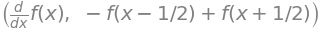

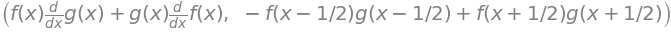

In [57]:
# finite differences

f = sp.Function('f')
g = sp.Function('g')

dfdx = f(x).diff(x)
dfdx, dfdx.as_finite_difference()

sp.diff(f(x)*g(x), x), sp.differentiate_finite(f(x)*g(x))

### Solvers: algebraic equations, solveset, differential equations, dsolve

In [58]:
# algebraic equation solvers
expr = x**2 - x
eqn = sp.Eq(expr, 0)
eqn

sp.solveset(eqn, x)
sp.solveset(expr, x) # assumes expr = 0 is the equation

expr = sp.sin(x) - 1
expr
sp.solveset(expr, x, domain=sp.S.Reals)

expr = sp.exp(x)
expr
sp.solveset(expr, x)

⎧        π │      ⎫
⎨2⋅n⋅π + ─ │ n ∊ ℤ⎬
⎩        2 │      ⎭

In [59]:
# systems of equations
x, y, z = sp.symbols('x y z')

expr1 = x + y + z - 1
expr2 = x + y + 2*z - 3
expr1, expr2
sp.linsolve([expr1, expr2], (x, y, z))

M = sp.Matrix(([1, 1, 1, 1], [1, 1, 2, 3]))
M
sp.linsolve(M, (x, y, z))

M = sp.Matrix(((1, 1, 1, 1), (1, 1, 2, 3)))
A, b = M[:, :-1], M[:, -1]
A, b
sp.linsolve((A, b), x, y, z)

sp.nonlinsolve([x*y - 1, x - 2], x, y)

⎡1  1  1  1⎤
⎢          ⎥
⎣1  1  2  3⎦

⎛⎡1  1  1⎤  ⎡1⎤⎞
⎜⎢       ⎥, ⎢ ⎥⎟
⎝⎣1  1  2⎦  ⎣3⎦⎠

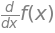

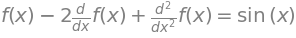

sympy.core.relational.Equality

In [60]:
# diff eq solvers
x = sp.symbols('x')
f = sp.symbols('f', cls=sp.Function)
f(x)
f(x).diff(x)

diffeq = sp.Eq(f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sp.sin(x))
diffeq

solution = sp.dsolve(diffeq, f(x))
type(solution)

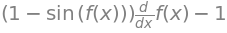

In [61]:
diffeq = f(x).diff(x)*(1 - sp.sin(f(x))) - 1
diffeq
sp.dsolve(diffeq, f(x))

### Matrices

### Lagrangian solution to SHO

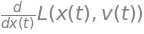

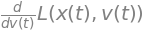

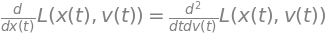

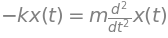

In [62]:
m, k, omega, t  = sp.symbols('m k omega t', positive=True)
L, v, x = sp.symbols('L v x', cls=sp.Function)
lagrangian = m / 2 * v(t)**2 - k / 2 * x(t)**2
sp.Eq(L(x(t), v(t)), lagrangian)

dLdx = sp.Derivative(L(x(t), v(t)), x(t)); dLdx
dLdv = sp.Derivative(L(x(t), v(t)), v(t)); dLdv

sp.Eq(dLdx, sp.Derivative(dLdv, t))
eom = sp.Eq(dLdx, sp.Derivative(dLdv, t)).subs(L(x(t), v(t)), lagrangian).doit()
eom = eom.subs(v(t), x(t).diff(t)); eom

solution = sp.dsolve(eom, x(t)).subs(sp.sqrt(k / m), omega); solution

### Two Body Problem

In [109]:
m, k, l, omega, t  = sp.symbols('m k l \omega t', positive=True)
L, rdot, r, phidot, phi = sp.symbols('L \dot{r} r \dot{\phi} \phi', cls=sp.Function)
lagrangian = m / 2 * (rdot(t)**2 + (r(t))**2 * phidot(t)**2) + k / r(t)
omega = l / (m * (r(t))**2) # conservation of angular momentum
sp.Eq(L(r(t), rdot(t), phidot(t)), lagrangian)

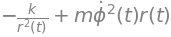

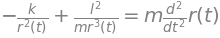

In [110]:
dLdr = sp.Derivative(L(r(t), rdot(t), phidot(t)), r(t)).subs(L(r(t), rdot(t), phidot(t)), lagrangian).doit(); dLdr
dLdrdot = sp.Derivative(L(r(t), rdot(t), phidot(t)), rdot(t)).subs(L(r(t), rdot(t), phidot(t)), lagrangian).doit(); dLdrdot

dLdr = dLdr.subs(phidot(t), omega)
eom = sp.Eq(dLdr, sp.Derivative(dLdrdot, t)).doit()
eom = eom.subs(rdot(t), r(t).diff(t)); eom

In [111]:
# solution = sp.dsolve(eom, r(t)); solution

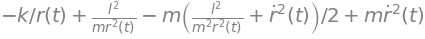

In [118]:
dLdphidot = sp.Derivative(L(r(t), rdot(t), phidot(t)), phidot(t)).subs(L(r(t), rdot(t), phidot(t)), lagrangian).doit(); dLdphidot

p_r = dLdrdot
p_phi = dLdphidot
#.subs(phidot(t), omega)

H = p_r * rdot(t) + p_phi * phidot(t) - L(r(t), rdot(t), phidot(t)).subs(L(r(t), rdot(t), phidot(t)), lagrangian)
H = H.subs(phidot(t), omega); H

### Quantum Mechanics

In [108]:
from sympy.physics.quantum import Ket, Bra, OuterProduct, Dagger, InnerProduct, Operator, TensorProduct
k = Ket('k')
b = Bra('b')
op = OuterProduct(k, b); op
op.hilbert_space
op.ket
op.bra
Dagger(op)
InnerProduct(b, k)
A = Operator('A'); A
Dagger(A)
TensorProduct(k, k)

In [107]:
b * k
k * b
A * k
b * A * k

In [97]:
k * b

In [103]:
b * k * b + b * k * b